# Code Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


from naive_bayes_classifier import NaiveBayes

# Reading the Data

In [2]:
inflammation_data = pd.read_csv('./inflammation_diagnosis.csv', delimiter=';')

# Inspecting the Data

In [3]:
inflammation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   temperature         120 non-null    float64
 1   nausea              120 non-null    object 
 2   lumbar_pain         120 non-null    object 
 3   urine_pushing       120 non-null    object 
 4   micturition_pains   120 non-null    object 
 5   burning_of_urethra  120 non-null    object 
 6   inflammation        120 non-null    object 
 7   nephritis           120 non-null    object 
dtypes: float64(1), object(7)
memory usage: 7.6+ KB


# Plot the data

plot with seaborn, use different colors and sort the values by colors

In [4]:
import seaborn as sns

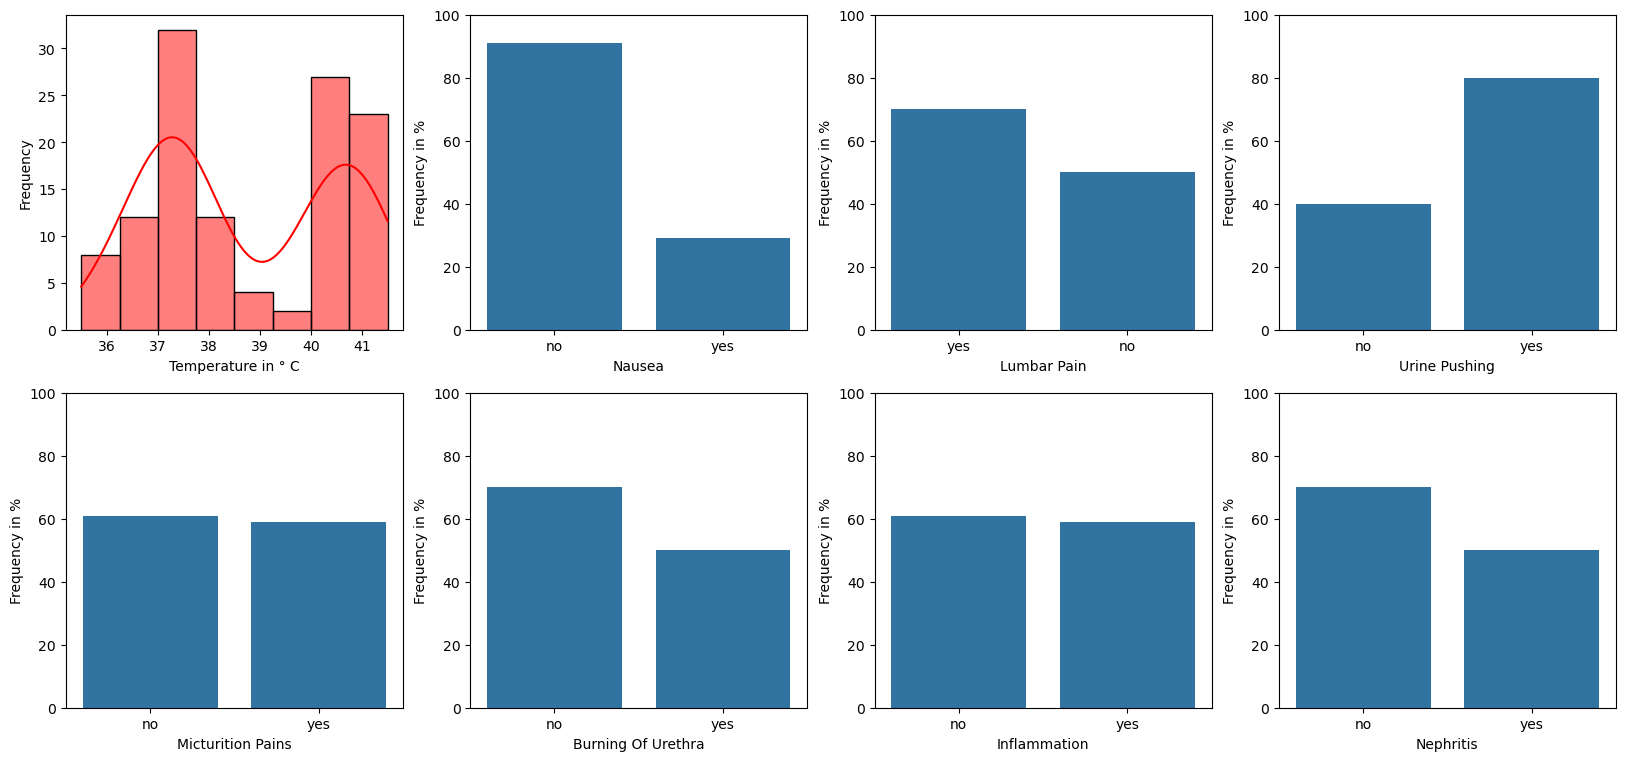

In [5]:
rows = 2
columns = 4
fig,ax = plt.subplots(nrows=rows, ncols=columns, figsize=(20,9))
[""]
index = 0 

for row in range(rows):
    for column in range(columns):
        nice_col_name = inflammation_data.columns.to_list()[index]
        nice_col_name = " ".join(word[0].upper() + word[1:] for word in nice_col_name.split("_"))
        
        
        if inflammation_data.columns[index] == 'temperature':
            s = sns.histplot(inflammation_data, ax=ax[row,column], x=inflammation_data.columns[column], kde=True, color='r')
            s.set(xlabel = 'Temperature in ° C', ylabel = "Frequency")
            
        else:
            b = sns.countplot(inflammation_data, x=inflammation_data.columns[index], ax=ax[row,column])
            b.set(xlabel = nice_col_name, ylabel = 'Frequency in %')
            b.set_ylim(0,100)
            
        index += 1

# Creating Labels
## Transforming Nominal Data to Booleans

In [6]:
inflammation_data = inflammation_data.replace(to_replace='no', value=False)
inflammation_data = inflammation_data.replace(to_replace='yes', value=True)

inflammation_data

,temperature,nausea,lumbar_pain,urine_pushing,micturition_pains,burning_of_urethra,inflammation,nephritis
0,35.5,False,True,False,False,False,False,False
1,35.9,False,False,True,True,True,True,False
2,35.9,False,True,False,False,False,False,False
3,36.0,False,False,True,True,True,True,False
4,36.0,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...
115,41.4,False,True,True,False,True,False,True
116,41.5,False,False,False,False,False,False,False
117,41.5,True,True,False,True,False,False,True
118,41.5,False,True,True,False,True,False,True


Checking if the columns are indeed of type boolean

In [7]:
inflammation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   temperature         120 non-null    float64
 1   nausea              120 non-null    bool   
 2   lumbar_pain         120 non-null    bool   
 3   urine_pushing       120 non-null    bool   
 4   micturition_pains   120 non-null    bool   
 5   burning_of_urethra  120 non-null    bool   
 6   inflammation        120 non-null    bool   
 7   nephritis           120 non-null    bool   
dtypes: bool(7), float64(1)
memory usage: 1.9 KB


## Adding Disease Labels 
Add the disease values to a new label-column and check if the values make sense

In [8]:
inflammation_data['disease'] = [False if (inflammation_data['inflammation'][i] == False) & (inflammation_data['nephritis'][i] == False) else True for i in range(0,len(inflammation_data))]

# Splitting the Data
Count the values of 'disease' to see how the data is distributed

In [9]:
inflammation_data['disease'].value_counts(True)

disease
True     0.75
False    0.25
Name: proportion, dtype: float64

## Calculating Split Indices
The data split must account for the obvious imbalance in the data. Therefore, calculate the indices of the splits.

# Drop duplicates to avoid the same patients for training and test set

<hr>
<h1> Think about when do drop data.....nicht, dass es was an der Wahrscheinlichkeit ändert
<br>
<hr>

In [ ]:
#inflammation_data = inflammation_data.drop_duplicates()

In [56]:
train = pd.concat([inflammation_data[inflammation_data['disease'] == True].sample(frac =0.8), inflammation_data[inflammation_data['disease'] == False].sample(frac = 0.8)])
test = inflammation_data.drop(train.index)

## Ensuring that the two dataframes do not share a column
The following merge shows duplicate rows across the two dataframes. If empty, there are no duplicates.

In [57]:
set(list(test.index)).isdisjoint(list(train.index))

True

# Shows same values for training and test set, this are not the same patiens, just patients with the same values 

In [58]:
result = train.merge(right=test, how='inner', indicator=False)
result

,temperature,nausea,lumbar_pain,urine_pushing,micturition_pains,burning_of_urethra,inflammation,nephritis,disease
0,37.9,False,False,True,True,False,True,False,True
1,40.0,True,True,False,True,False,False,True,True
2,37.6,False,False,True,True,False,True,False,True
3,37.0,False,False,True,True,True,True,False,True
4,37.0,False,False,True,True,True,True,False,True
5,37.0,False,False,True,True,True,True,False,True
6,38.0,False,True,True,False,True,False,True,True
7,41.5,False,True,True,False,True,False,True,True
8,37.0,False,False,True,True,False,True,False,True
9,37.5,False,False,True,False,False,True,False,True


In [59]:
train_1 = train
test_1 = test

test_1['original_index'] = range(1, len(test_1) + 1)
train_1['original_index'] = range(1, len(train_1) + 1)

result_1 = train_1.merge(right=test_1, how='inner', indicator=False)
result_1

,temperature,nausea,lumbar_pain,urine_pushing,micturition_pains,burning_of_urethra,inflammation,nephritis,disease,original_index


# TESTING

In [13]:
test

,temperature,nausea,lumbar_pain,urine_pushing,micturition_pains,burning_of_urethra,inflammation,nephritis,disease
3,36.0,False,False,True,True,True,True,False,True
4,36.0,False,True,False,False,False,False,False,False
8,36.3,False,False,True,True,True,True,False,True
10,36.6,False,False,True,True,True,True,False,True
12,36.6,False,True,False,False,False,False,False,False
19,36.9,False,True,False,False,False,False,False,False
24,37.0,False,False,True,True,True,True,False,True
30,37.1,False,False,True,False,False,True,False,True
34,37.3,False,True,False,False,False,False,False,False
44,37.5,False,False,True,False,False,True,False,True


### Was machen wir, wenn es eine Wahrscheinlichekti nicht gibt ?, die müsste ja dann null sein oder 

In [14]:
inflammation_data.groupby(["disease", inflammation_data["nausea"]]).size()/  inflammation_data.groupby(["disease"]).size()

disease  nausea
False    False     1.000000
True     False     0.677778
         True      0.322222
dtype: float64

# positiv posterior soll grösser sein als negative posterior

evidence noch berechnen mit negative and positive posterior <hr>

In [64]:
t = NaiveBayes()
p,f = t.fit(train, "disease")
print(p)
print("''''''''''''''")
print(f)


{'temperature':           False      True 
mean  38.120833  38.972222
std    1.941756   1.793118}
''''''''''''''
         nausea  lumbar_pain  urine_pushing  micturition_pains  \
False  0.000000     0.666667          0.000           0.000000   
True   0.347222     0.583333          0.875           0.680556   

       burning_of_urethra  inflammation  nephritis  disease  original_index  
False            0.000000      0.000000   0.000000      0.0             0.0  
True             0.611111      0.638889   0.583333      1.0             0.0  


In [ ]:
p["temperature"][False]["mean"]

38.15416666666667

In [ ]:
f = pd.DataFrame.from_dict(f)

,nausea,lumbar_pain,urine_pushing,micturition_pains,burning_of_urethra,inflammation,nephritis,disease
False,0.000000,0.600000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
True,0.372881,0.610169,0.881356,0.661017,0.59322,0.644068,0.610169,1.0


In [18]:
inflammation_data.groupby(["disease", inflammation_data["nausea"]]).size()/  inflammation_data.groupby(["disease"]).size()

disease  nausea
False    False     1.000000
True     False     0.677778
         True      0.322222
dtype: float64

<hr>
<br>

<ul>
<li>wenn ich fertig bin, so programmieren, dass man alle duplicates aus der temperature nimmt und dann nur noch einträgt</li>
<li>maybe auch schönes pd dataframe basteln als v-loook up </li>
<li>wenn temperatur neuer wert ist, dann die zwei closesten wählen und den durchschnitt nehmen</li>
</ul>
<br>
<hr>

In [ ]:
c = inflammation_data.groupby(["disease", "nephritis"]).size()/ inflammation_data.groupby(["disease"]).size()
c

disease  nephritis
False    False        1.000000
True     False        0.405405
         True         0.594595
dtype: float64

In [66]:
f

,nausea,lumbar_pain,urine_pushing,micturition_pains,burning_of_urethra,inflammation,nephritis,disease,original_index
False,0.000000,0.666667,0.000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
True,0.347222,0.583333,0.875,0.680556,0.611111,0.638889,0.583333,1.0,0.0


In [10]:
training_tuples = round((len(inflammation_data)/10)*8)
df_training = inflammation_data.iloc[:training_tuples,:]
df_test = inflammation_data.iloc[training_tuples:,:]
df_test = df_test.reset_index(drop=True)

df_training

,temperature,nausea,lumbar_pain,urine_pushing,micturition_pains,burning_of_urethra,inflammation,nephritis,disease
0,35.5,False,True,False,False,False,False,False,False
1,35.9,False,False,True,True,True,True,False,True
2,35.9,False,True,False,False,False,False,False,False
3,36.0,False,False,True,True,True,True,False,True
4,36.0,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
91,40.6,True,True,False,True,False,False,True,True
92,40.7,True,True,True,True,True,True,True,True
93,40.7,True,True,True,True,False,True,True,True
94,40.7,False,False,False,False,False,False,False,False


In [11]:
df_test = df_test.drop("disease",axis=1)


In [12]:
d = {"key": 1.1, "st":2.2}
d.values()

dict_values([1.1, 2.2])

In [14]:
t = NaiveBayes()
gaus, discrete  = t.fit(df_training, "disease")
result = t.predict_probability(df_test, "disease")
result

False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True


,temperature,nausea,lumbar_pain,urine_pushing,micturition_pains,burning_of_urethra,inflammation,nephritis,disease
0,40.7,False,True,True,False,True,False,True,False
1,40.8,False,True,True,False,True,False,True,False
2,40.9,True,True,True,True,False,True,True,False
3,40.9,True,True,True,True,False,True,True,False
4,40.9,False,True,True,False,True,False,True,False
5,41.0,True,True,True,True,True,True,True,False
6,41.0,False,False,False,False,False,False,False,False
7,41.0,True,True,False,True,False,False,True,False
8,41.0,False,True,True,False,True,False,True,False
9,41.1,True,True,True,True,True,True,True,False


In [15]:
discrete["lumbar_pain"][False]

0.7692307692307693

In [13]:
sum([0.0,0.0])

0.0